<a href="https://colab.research.google.com/github/sonalisanjeevprabu18/Neural-Network-and-Deep-Learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 26ms/step - accuracy: 0.9026 - loss: 0.3192
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9853 - loss: 0.0454
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9903 - loss: 0.0302
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted Label: 7
Actual Label: 7


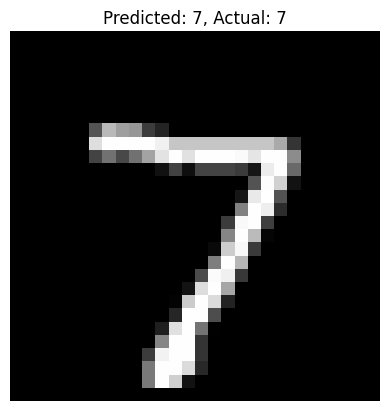

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Preprocess
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# 3. Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Compile and Train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3) # Training for 3 epochs for speed

# 5. Predict a Single Example
index = 0  # Change this number to test different images
image = x_test[index]
true_label = y_test[index]

# Add batch dimension (1, 28, 28, 1) needed for prediction
prediction_scores = model.predict(image.reshape(1, 28, 28, 1))
predicted_label = np.argmax(prediction_scores)

# 6. Show Result
print(f"Predicted Label: {predicted_label}")
print(f"Actual Label: {true_label}")

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {true_label}")
plt.axis('off')
plt.show()

Unzipping /content/t10k-images.idx3-ubyte.zip...
Successfully extracted: /content/t10k-images.idx3-ubyte

Loading MNIST dataset and training model...

Training model (this may take a minute)...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.8327 - loss: 0.5542 - val_accuracy: 0.9813 - val_loss: 0.0633
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.9777 - loss: 0.0774 - val_accuracy: 0.9885 - val_loss: 0.0428
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.9842 - loss: 0.0499 - val_accuracy: 0.9902 - val_loss: 0.0374
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.9864 - loss: 0.0407 - val_accuracy: 0.9883 - val_loss: 0.0404
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.9908 - loss: 0.0299 - val_accuracy: 0.9902 - val_loss: 0.0364

Test Accuracy: 99.19%

Loading images from /content/t10k-images.idx3-ubyte...
Loaded 10000 images.

MNIST Digit Predictor



Predicted Digit: 0
Confidence: 100.00%

Top 3 predictions:
  1. Digit 0: 100.00%
  2. Digit 9: 0.00%
  3. Digit 8: 0.00%


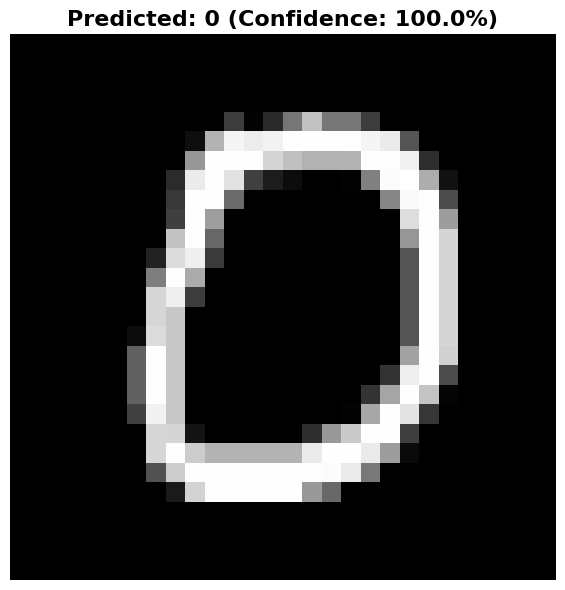

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os

# --- STEP 1: Unzip the test images ---
zip_path = '/content/t10k-images.idx3-ubyte.zip'
extract_to = '/content/'

print(f"Unzipping {zip_path}...")
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        extracted_file_name = zip_ref.namelist()[0]
        full_image_path = os.path.join(extract_to, extracted_file_name)
        print(f"Successfully extracted: {full_image_path}")
else:
    print("ERROR: Zip file not found!")

# --- STEP 2: Load MNIST data and train a better model ---
print("\nLoading MNIST dataset and training model...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Build a more robust model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train for more epochs for better accuracy
print("\nTraining model (this may take a minute)...")
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# --- STEP 3: Load custom images and predict ---
def load_images_from_idx_file(path):
    """Load images from IDX3 format file"""
    with open(path, 'rb') as f:
        # Read header
        magic = int.from_bytes(f.read(4), 'big')
        num_images = int.from_bytes(f.read(4), 'big')
        num_rows = int.from_bytes(f.read(4), 'big')
        num_cols = int.from_bytes(f.read(4), 'big')

        # Read image data
        data = np.fromfile(f, dtype=np.uint8)
        return data.reshape(num_images, num_rows, num_cols)

print(f"\nLoading images from {full_image_path}...")
my_images = load_images_from_idx_file(full_image_path)
print(f"Loaded {len(my_images)} images.\n")

# --- STEP 4: Interactive prediction ---
print("=" * 50)
print("MNIST Digit Predictor")
print("=" * 50)

while True:
    try:
        val = input(f"\nEnter image index (0 - {len(my_images)-1}) to predict (or 'q' to quit): ")
        if val.lower() == 'q':
            print("Exiting...")
            break

        idx = int(val)
        if idx < 0 or idx >= len(my_images):
            print(f"Please enter a number between 0 and {len(my_images)-1}")
            continue

        img = my_images[idx]

        # Prepare for prediction - normalize the same way as training data
        pred_input = img.reshape(1, 28, 28, 1).astype('float32') / 255.0

        # Get prediction probabilities
        predictions = model.predict(pred_input, verbose=0)[0]
        predicted_digit = np.argmax(predictions)
        confidence = predictions[predicted_digit] * 100

        # Display results
        print(f"\n{'='*50}")
        print(f"Predicted Digit: {predicted_digit}")
        print(f"Confidence: {confidence:.2f}%")
        print(f"{'='*50}")

        # Show top 3 predictions
        top_3_indices = np.argsort(predictions)[-3:][::-1]
        print("\nTop 3 predictions:")
        for i, digit in enumerate(top_3_indices, 1):
            print(f"  {i}. Digit {digit}: {predictions[digit]*100:.2f}%")

        # Visualize
        plt.figure(figsize=(6, 6))
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f"Predicted: {predicted_digit} (Confidence: {confidence:.1f}%)",
                  fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

    except ValueError:
        print("Invalid input. Please enter a number or 'q' to quit.")
    except Exception as e:
        print(f"An error occurred: {e}")